## Linear Regression

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as LR
import shap
import toad
import pingouin as pg
path1 = 'count_year_region_new.csv'
path2 = '省级数据2021统一 名称.csv'

In [23]:
df1 = pd.read_csv(path1)
df1 = df1.drop(df1.columns[0], axis=1)
df1 = df1.drop('year',axis = 1)
df1.columns = ['地区', 'counts']
df1

,地区,counts
0,上海,1338
1,中国,68
2,中国台湾,26
3,中国澳门,6
4,中国香港,60
...,...,...
64,陕西,502
65,青海,22
66,韩国,5
67,马来西亚,13


In [24]:
df2 = pd.read_csv(path2)
df2

,地区,GDP,Population,Average_Disposable_Income,Industrial_Added_Value,Number_of_Health_Care_Institutions,Urban_Population,Rural_Population,Mobile_Internet_User,Number_medical_insurance,...,5g_user,land_area,Under_Graduate,Post_Graduate,Top_Rank_University,Public_Expenditure,Educational_Expenditure,Science_Expenditure,Insurance_Expenditure,Health_Expenditure
0,北京,41610.90,2184.3000,77415.0,5855.1,12211,1912.800,271.5000,3926.90,1886.9,...,1436.0,1.700,60.3000,43.5000,34,7469.00,1171.00,488.00,1067.00,775.00
1,天津,15685.10,1363.0000,48976.0,5056.5,6282,1160.000,203.0000,1536.83,1175.0,...,572.6,1.200,59.4500,9.2800,5,2751.00,480.00,63.00,553.00,174.00
2,河北,42370.40,7420.0000,30867.0,14132.3,90206,4575.000,2845.0000,7578.80,7091.0,...,2559.4,19.000,177.3700,8.1800,1,9336.00,1767.00,117.00,1622.00,930.00
3,山西,25642.59,3481.3500,29178.0,10543.6,41007,2226.500,1254.8500,3325.81,3246.0,...,1356.5,16.000,13.6000,5.6000,2,5872.00,861.00,61.00,999.00,494.00
4,内蒙古,23159.00,2401.1700,35921.0,8443.8,25062,1647.200,753.9700,2577.00,2192.2,...,874.4,118.000,53.5000,3.8000,1,3364.00,79.00,10.00,238.00,19.00
5,辽宁,28975.10,4197.0000,36089.0,9386.5,32679,3064.000,1133.0000,2420.80,3808.3,...,1471.7,15.000,118.0000,17.2000,4,8858.00,703.00,78.00,1649.00,399.00
6,吉林,13070.24,2347.6900,35471.0,3839.5,25344,1496.100,851.5100,2429.80,2290.3,...,898.8,19.000,78.8700,9.6900,3,4044.00,497.80,22.40,896.90,381.60
7,黑龙江,15901.00,3099.0000,28346.0,3751.0,20599,2052.000,1047.0000,3136.90,2821.1,...,1134.8,46.000,91.2000,11.3000,4,5250.00,605.00,38.00,1450.00,364.00
8,上海,44652.80,2487.0895,79610.0,10676.7,6421,2220.938,266.1515,3616.60,1978.5,...,1275.6,0.634,55.4800,24.4900,15,9393.20,1109.00,427.80,1144.50,803.90
9,江苏,122875.60,8515.0000,49862.0,45730.7,36997,6335.160,2179.8400,8753.62,8063.8,...,3631.8,10.000,221.9000,30.0000,16,14903.00,2597.00,679.00,1945.00,1440.00


In [25]:
df3 = pd.merge(df1, df2, how='right')
df3

,地区,counts,GDP,Population,Average_Disposable_Income,Industrial_Added_Value,Number_of_Health_Care_Institutions,Urban_Population,Rural_Population,Mobile_Internet_User,...,5g_user,land_area,Under_Graduate,Post_Graduate,Top_Rank_University,Public_Expenditure,Educational_Expenditure,Science_Expenditure,Insurance_Expenditure,Health_Expenditure
0,北京,35028,41610.90,2184.3000,77415.0,5855.1,12211,1912.800,271.5000,3926.90,...,1436.0,1.700,60.3000,43.5000,34,7469.00,1171.00,488.00,1067.00,775.00
1,天津,1964,15685.10,1363.0000,48976.0,5056.5,6282,1160.000,203.0000,1536.83,...,572.6,1.200,59.4500,9.2800,5,2751.00,480.00,63.00,553.00,174.00
2,河北,3528,42370.40,7420.0000,30867.0,14132.3,90206,4575.000,2845.0000,7578.80,...,2559.4,19.000,177.3700,8.1800,1,9336.00,1767.00,117.00,1622.00,930.00
3,山西,306,25642.59,3481.3500,29178.0,10543.6,41007,2226.500,1254.8500,3325.81,...,1356.5,16.000,13.6000,5.6000,2,5872.00,861.00,61.00,999.00,494.00
4,内蒙古,171,23159.00,2401.1700,35921.0,8443.8,25062,1647.200,753.9700,2577.00,...,874.4,118.000,53.5000,3.8000,1,3364.00,79.00,10.00,238.00,19.00
5,辽宁,870,28975.10,4197.0000,36089.0,9386.5,32679,3064.000,1133.0000,2420.80,...,1471.7,15.000,118.0000,17.2000,4,8858.00,703.00,78.00,1649.00,399.00
6,吉林,283,13070.24,2347.6900,35471.0,3839.5,25344,1496.100,851.5100,2429.80,...,898.8,19.000,78.8700,9.6900,3,4044.00,497.80,22.40,896.90,381.60
7,黑龙江,394,15901.00,3099.0000,28346.0,3751.0,20599,2052.000,1047.0000,3136.90,...,1134.8,46.000,91.2000,11.3000,4,5250.00,605.00,38.00,1450.00,364.00
8,上海,1338,44652.80,2487.0895,79610.0,10676.7,6421,2220.938,266.1515,3616.60,...,1275.6,0.634,55.4800,24.4900,15,9393.20,1109.00,427.80,1144.50,803.90
9,江苏,1585,122875.60,8515.0000,49862.0,45730.7,36997,6335.160,2179.8400,8753.62,...,3631.8,10.000,221.9000,30.0000,16,14903.00,2597.00,679.00,1945.00,1440.00


In [26]:
df4 = df3.drop('地区', axis=1)
df4

,counts,GDP,Population,Average_Disposable_Income,Industrial_Added_Value,Number_of_Health_Care_Institutions,Urban_Population,Rural_Population,Mobile_Internet_User,Number_medical_insurance,...,5g_user,land_area,Under_Graduate,Post_Graduate,Top_Rank_University,Public_Expenditure,Educational_Expenditure,Science_Expenditure,Insurance_Expenditure,Health_Expenditure
0,35028,41610.90,2184.3000,77415.0,5855.1,12211,1912.800,271.5000,3926.90,1886.9,...,1436.0,1.700,60.3000,43.5000,34,7469.00,1171.00,488.00,1067.00,775.00
1,1964,15685.10,1363.0000,48976.0,5056.5,6282,1160.000,203.0000,1536.83,1175.0,...,572.6,1.200,59.4500,9.2800,5,2751.00,480.00,63.00,553.00,174.00
2,3528,42370.40,7420.0000,30867.0,14132.3,90206,4575.000,2845.0000,7578.80,7091.0,...,2559.4,19.000,177.3700,8.1800,1,9336.00,1767.00,117.00,1622.00,930.00
3,306,25642.59,3481.3500,29178.0,10543.6,41007,2226.500,1254.8500,3325.81,3246.0,...,1356.5,16.000,13.6000,5.6000,2,5872.00,861.00,61.00,999.00,494.00
4,171,23159.00,2401.1700,35921.0,8443.8,25062,1647.200,753.9700,2577.00,2192.2,...,874.4,118.000,53.5000,3.8000,1,3364.00,79.00,10.00,238.00,19.00
5,870,28975.10,4197.0000,36089.0,9386.5,32679,3064.000,1133.0000,2420.80,3808.3,...,1471.7,15.000,118.0000,17.2000,4,8858.00,703.00,78.00,1649.00,399.00
6,283,13070.24,2347.6900,35471.0,3839.5,25344,1496.100,851.5100,2429.80,2290.3,...,898.8,19.000,78.8700,9.6900,3,4044.00,497.80,22.40,896.90,381.60
7,394,15901.00,3099.0000,28346.0,3751.0,20599,2052.000,1047.0000,3136.90,2821.1,...,1134.8,46.000,91.2000,11.3000,4,5250.00,605.00,38.00,1450.00,364.00
8,1338,44652.80,2487.0895,79610.0,10676.7,6421,2220.938,266.1515,3616.60,1978.5,...,1275.6,0.634,55.4800,24.4900,15,9393.20,1109.00,427.80,1144.50,803.90
9,1585,122875.60,8515.0000,49862.0,45730.7,36997,6335.160,2179.8400,8753.62,8063.8,...,3631.8,10.000,221.9000,30.0000,16,14903.00,2597.00,679.00,1945.00,1440.00


In [28]:
# Covid Data
df_covid = pd.read_csv('Covid_Data.csv')
df_covid.drop(df_covid.columns[0], axis=1, inplace=True)
df_covid

,confirmedCount_end,suspectedCount_end,curedCount_end,deadCount_end,confirmedCount_start,suspectedCount_start,curedCount_start,deadCount_start,地区
0,64978,393.0,64098,595,3103,393.0,2915,7,上海
1,5007,23.0,4072,2,1817,22.0,1732,2,云南
2,8237,35.0,7962,1,1186,35.0,1129,1,内蒙古
3,25249,164.0,14283,13,1211,164.0,1190,9,北京
4,40481,19.0,40422,5,589,19.0,582,3,吉林
5,11315,22.0,9929,5,1321,22.0,1283,3,四川
6,2627,50.0,2566,3,589,50.0,527,3,天津
7,238,0.0,237,0,122,0.0,122,0,宁夏
8,1699,2.0,1654,6,1009,2.0,1003,6,安徽
9,4564,14.0,4131,8,1043,14.0,1012,7,山东


In [29]:
df_pd_covid = pd.merge(df3, df_covid)
df_pd_covid

,地区,counts,GDP,Population,Average_Disposable_Income,Industrial_Added_Value,Number_of_Health_Care_Institutions,Urban_Population,Rural_Population,Mobile_Internet_User,...,Insurance_Expenditure,Health_Expenditure,confirmedCount_end,suspectedCount_end,curedCount_end,deadCount_end,confirmedCount_start,suspectedCount_start,curedCount_start,deadCount_start
0,北京,35028,41610.90,2184.3000,77415.0,5855.1,12211,1912.800,271.5000,3926.90,...,1067.00,775.00,25249,164.0,14283,13,1211,164.0,1190,9
1,天津,1964,15685.10,1363.0000,48976.0,5056.5,6282,1160.000,203.0000,1536.83,...,553.00,174.00,2627,50.0,2566,3,589,50.0,527,3
2,河北,3528,42370.40,7420.0000,30867.0,14132.3,90206,4575.000,2845.0000,7578.80,...,1622.00,930.00,2839,0.0,2774,7,1461,0.0,1451,7
3,山西,306,25642.59,3481.3500,29178.0,10543.6,41007,2226.500,1254.8500,3325.81,...,999.00,494.00,5006,64.0,3882,0,267,64.0,265,0
4,内蒙古,171,23159.00,2401.1700,35921.0,8443.8,25062,1647.200,753.9700,2577.00,...,238.00,19.00,8237,35.0,7962,1,1186,35.0,1129,1
5,辽宁,870,28975.10,4197.0000,36089.0,9386.5,32679,3064.000,1133.0000,2420.80,...,1649.00,399.00,3023,0.0,2683,2,795,0.0,788,2
6,吉林,283,13070.24,2347.6900,35471.0,3839.5,25344,1496.100,851.5100,2429.80,...,896.90,381.60,40481,19.0,40422,5,589,19.0,582,3
7,黑龙江,394,15901.00,3099.0000,28346.0,3751.0,20599,2052.000,1047.0000,3136.90,...,1450.00,364.00,5389,430.0,4984,13,2039,394.0,2022,13
8,上海,1338,44652.80,2487.0895,79610.0,10676.7,6421,2220.938,266.1515,3616.60,...,1144.50,803.90,64978,393.0,64098,595,3103,393.0,2915,7
9,江苏,1585,122875.60,8515.0000,49862.0,45730.7,36997,6335.160,2179.8400,8753.62,...,1945.00,1440.00,3796,3.0,3667,0,1625,3.0,1621,0


In [30]:
df_pd_covid.columns

Index(['地区', 'counts', 'GDP', 'Population', 'Average_Disposable_Income',
       'Industrial_Added_Value', 'Number_of_Health_Care_Institutions',
       'Urban_Population', 'Rural_Population', 'Mobile_Internet_User',
       'Number_medical_insurance', 'Aging_of_Population', '5g_base_station',
       '5g_user', 'land_area', 'Under_Graduate', 'Post_Graduate',
       'Top_Rank_University', 'Public_Expenditure', 'Educational_Expenditure',
       'Science_Expenditure', 'Insurance_Expenditure', 'Health_Expenditure',
       'confirmedCount_end', 'suspectedCount_end', 'curedCount_end',
       'deadCount_end', 'confirmedCount_start', 'suspectedCount_start',
       'curedCount_start', 'deadCount_start'],
      dtype='object')

In [31]:
feats = ['GDP', 'Average_Disposable_Income','Number_of_Health_Care_Institutions',
       'Urban_Population', 'Rural_Population', 'Mobile_Internet_User',
       'Number_medical_insurance', 'Aging_of_Population', '5g_base_station',
       '5g_user','Under_Graduate', 'Post_Graduate', 'Top_Rank_University','Public_Expenditure',
       'Educational_Expenditure', 'Science_Expenditure',
       'Insurance_Expenditure', 'Health_Expenditure', 
       'confirmedCount_end', 'suspectedCount_end', 'curedCount_end',
       'deadCount_end']
LABEL = 'counts'

X = df_pd_covid[feats]
y =df_pd_covid[LABEL]

X['Urban_Portion'] = df_pd_covid['Urban_Population'] / df_pd_covid['Population']

X['Edu_ratio'] = df_pd_covid['Educational_Expenditure'] / df_pd_covid['Public_Expenditure']

X['Sci_ratio'] = df_pd_covid['Science_Expenditure'] / df_pd_covid['Public_Expenditure']

X['Ins_ratio'] = df_pd_covid['Insurance_Expenditure'] / df_pd_covid['Public_Expenditure']

X['Hea_ratio'] = df_pd_covid['Health_Expenditure'] / df_pd_covid['Public_Expenditure']

model_lr = LR(normalize = True).fit(X, y)
y_pred_lr = model_lr.predict(X)
coef = model_lr.coef_

print('=============================================================================')
for i, v in enumerate(coef):
       print('%-60s%-20s' % ('Feature: %s'%(X.columns[i]), 'Coef: %.5f'%(v)))
       
print('=============================================================================')
print(model_lr.score(X, y))

Feature: GDP                                                Coef: -0.11708      
Feature: Average_Disposable_Income                          Coef: 0.26415       
Feature: Number_of_Health_Care_Institutions                 Coef: 0.02782       
Feature: Urban_Population                                   Coef: 6.23811       
Feature: Rural_Population                                   Coef: 5.82104       
Feature: Mobile_Internet_User                               Coef: 1.35949       
Feature: Number_medical_insurance                           Coef: -3.65452      
Feature: Aging_of_Population                                Coef: 29965.86650   
Feature: 5g_base_station                                    Coef: 0.03891       
Feature: 5g_user                                            Coef: -12.35054     
Feature: Under_Graduate                                     Coef: 8.43925       
Feature: Post_Graduate                                      Coef: 4.78020       
Feature: Top_Rank_University


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [32]:
X['counts'] = y
final_data = toad.selection.stepwise(X,target = 'counts', estimator='ols', direction = 'backward', criterion = 'aic')
final_data.columns
# stepwise regression, p-value threhold is 0.01


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['GDP', 'Average_Disposable_Income', 'Urban_Population',
       'Rural_Population', 'Mobile_Internet_User', 'Number_medical_insurance',
       'Aging_of_Population', '5g_base_station', '5g_user',
       'Top_Rank_University', 'Public_Expenditure', 'Insurance_Expenditure',
       'confirmedCount_end', 'suspectedCount_end', 'curedCount_end',
       'Urban_Portion', 'Edu_ratio', 'Ins_ratio', 'Hea_ratio', 'counts'],
      dtype='object')

In [34]:
model_lr = LR().fit(X[final_data.columns[:-1]], y)
coef = model_lr.coef_

print('=============================================================================')
for i, v in enumerate(coef):
       print('%-60s%-20s' % ('Feature: %s'%(final_data.columns[:-1][i]), 'Coef: %.5f'%(v)))
       
print('=============================================================================')

Feature: GDP                                                Coef: -0.15296      
Feature: Average_Disposable_Income                          Coef: 0.32447       
Feature: Urban_Population                                   Coef: 9.31412       
Feature: Rural_Population                                   Coef: 5.87460       
Feature: Mobile_Internet_User                               Coef: 1.41421       
Feature: Number_medical_insurance                           Coef: -3.87271      
Feature: Aging_of_Population                                Coef: 30254.38582   
Feature: 5g_base_station                                    Coef: 0.02790       
Feature: 5g_user                                            Coef: -13.07601     
Feature: Top_Rank_University                                Coef: 572.92541     
Feature: Public_Expenditure                                 Coef: 1.37901       
Feature: Insurance_Expenditure                              Coef: -11.36444     
Feature: confirmedCount_end 

In [13]:
# tmp = X.copy()
# tmp['counts'] = y
# tmp.to_csv('data/macro.csv',index=False)
# data for R

In [43]:
ols = sm.OLS(y, X[final_data.columns[:-1]])
model_ols = ols.fit()
print(model_ols.aic)

519.9901295903044


In [44]:
ols = pg.linear_regression(X[final_data.columns[:-1]],y)
ols

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-309.628252,2341.867369,-0.132214,0.897202,0.991139,0.975833,-5464.043577,4844.787073
1,GDP,-0.152956,0.047827,-3.198099,0.008483,0.991139,0.975833,-0.258223,-0.047689
2,Average_Disposable_Income,0.324471,0.063783,5.087121,0.000351,0.991139,0.975833,0.184086,0.464857
3,Urban_Population,9.314121,1.984127,4.694316,0.000656,0.991139,0.975833,4.947086,13.681155
4,Rural_Population,5.874602,1.980116,2.966797,0.012819,0.991139,0.975833,1.516396,10.232807
5,Mobile_Internet_User,1.414211,0.613652,2.304581,0.041694,0.991139,0.975833,0.063572,2.764850
6,Number_medical_insurance,-3.872712,1.197532,-3.233912,0.007960,0.991139,0.975833,-6.508461,-1.236963
7,Aging_of_Population,30254.385822,9113.678007,3.319668,0.006835,0.991139,0.975833,10195.315774,50313.455869
8,5g_base_station,0.027901,0.020372,1.369590,0.198125,0.991139,0.975833,-0.016937,0.072739
9,5g_user,-13.076012,2.211259,-5.913379,0.000101,0.991139,0.975833,-17.942961,-8.209064


In [52]:
feats = ['GDP', 'Educational_Expenditure', 'Science_Expenditure','Top_Rank_University','confirmedCount_end','curedCount_end']
LABEL = 'counts'

X2 = df_pd_covid[feats]
y2 = df_pd_covid[LABEL]

X2['Edu_ratio'] = df_pd_covid['Educational_Expenditure'] / df_pd_covid['Public_Expenditure']
X2['Sci_ratio'] = df_pd_covid['Science_Expenditure'] / df_pd_covid['Public_Expenditure']

ols = pg.linear_regression(X2,y)
ols
# select related features/interested for researching


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,368.102779,1182.411052,0.311315,7.584917e-01,0.928285,0.902207,-2084.067657,2820.273216
1,GDP,-0.063807,0.040870,-1.561209,1.327455e-01,0.928285,0.902207,-0.148567,0.020953
2,Educational_Expenditure,3.869003,2.204104,1.755363,9.311397e-02,0.928285,0.902207,-0.702030,8.440035
3,Science_Expenditure,-19.768249,8.789684,-2.249029,3.485425e-02,0.928285,0.902207,-37.996937,-1.539561
4,Top_Rank_University,584.466947,84.727152,6.898225,6.298444e-07,0.928285,0.902207,408.753588,760.180305
5,confirmedCount_end,1.308343,0.217028,6.028447,4.560757e-06,0.928285,0.902207,0.858254,1.758432
6,curedCount_end,-1.413707,0.223537,-6.324276,2.301978e-06,0.928285,0.902207,-1.877294,-0.950121
7,Edu_ratio,-25929.927889,16710.019241,-1.551759,1.349876e-01,0.928285,0.902207,-60584.386757,8724.530979
8,Sci_ratio,179097.213572,78344.901889,2.286010,3.224743e-02,0.928285,0.902207,16619.831536,341574.595608


In [55]:
abbr_to_full = {
    "GDP": "GDP",
    "Educational_Expenditure": "Educational Expenditure",
    "Science_Expenditure": "Science Expenditure",
    "Top_Rank_University": "Top Rank University",
    "confirmedCount_end": "Annual Confirmed Cases",
    "curedCount_end": "Annual Cured Cases",
    "Edu_ratio": "Education Expenditure Ratio",
    "Sci_ratio": "Sci.&Tech.Expenditure Ratio",
    # hash feature names
}

X2 = X2.rename(columns=abbr_to_full)
model_lr_2 = LR().fit(X2, y2)
y_pred_lr_2 = model_lr_2.predict(X2)
coef_2 = model_lr_2.coef_

print('=============================================================================')
for i, v in enumerate(coef_2):
       print('%-60s%-20s' % ('Feature: %s'%(X2.columns[i]), 'Coef: %.5f'%(v)))
       
print('=============================================================================')
print(('R-square: %.5f') % (model_lr_2.score(X2, y2)))

Feature: GDP                                                Coef: -0.06381      
Feature: Educational Expenditure                            Coef: 3.86900       
Feature: Science Expenditure                                Coef: -19.76825     
Feature: Top Rank University                                Coef: 584.46695     
Feature: Annual Confirmed Cases                             Coef: 1.30834       
Feature: Annual Cured Cases                                 Coef: -1.41371      
Feature: Education Expenditure Ratio                        Coef: -25929.92789  
Feature: Sci.&Tech.Expenditure Ratio                        Coef: 179097.21357  
R-square: 0.92828


X does not have valid feature names, but LinearRegression was fitted with feature names
  0%|          | 0/31 [00:00<?, ?it/s]X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
 10%|▉         | 3/31 [00:00<00:01, 23.32it/s]X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names,

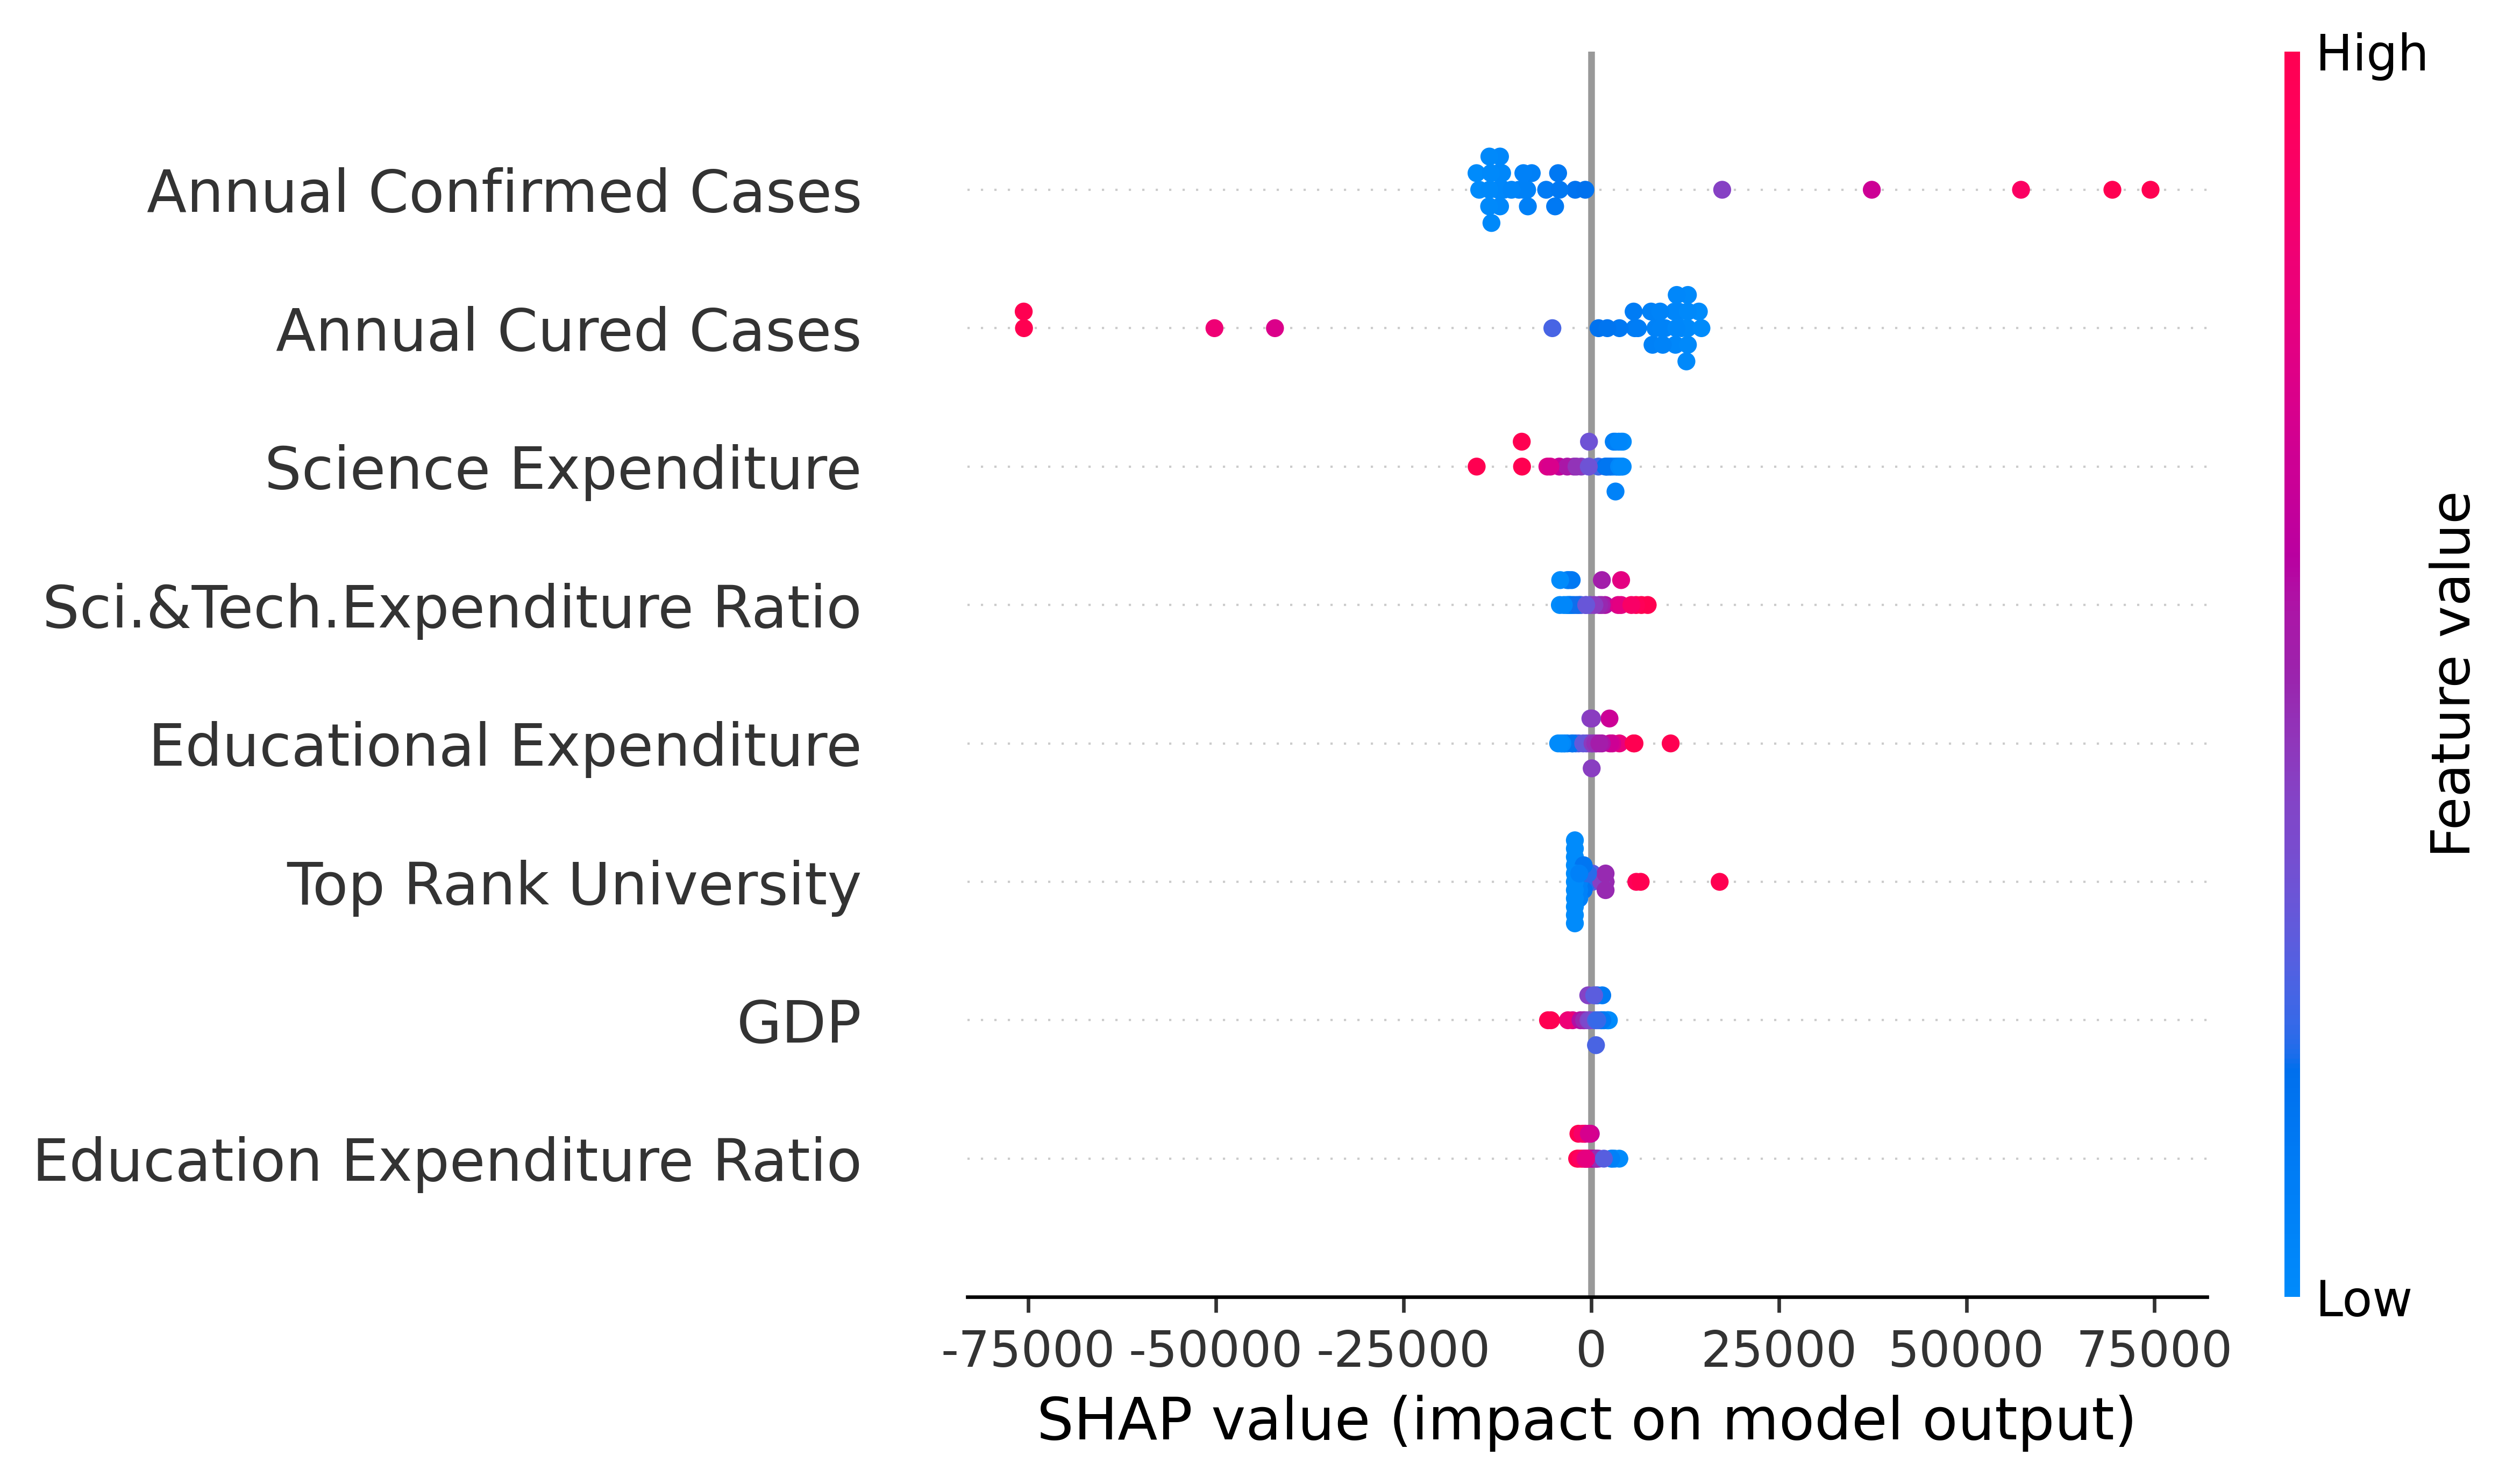

In [56]:
abbr_to_full = {
    "GDP": "GDP",
    "Educational_Expenditure ": "Educational Expenditure",
    "Science_Expenditure": "Science Expenditure",
    "Top_Rank_University": "Top Rank University",
    "confirmedCount_end": "Annual Confirmed Cases",
    "curedCount_end": "Annual Cured Cases",
    "Edu_ratio": "Education Expenditure Ratio",
    "Sci_ratio": "Sci.&Tech.Expenditure Ratio",
    # 其他缩写到全称的映射
}


explainer_2 = shap.KernelExplainer(model_lr_2.predict,X2)
shap_values_2 = explainer_2.shap_values(X2)
plt.figure(figsize=(8,8),dpi=600)
plt.rcParams['axes.unicode_minus']=False
shap.summary_plot(shap_values_2, X2)